# Evaluate AlphaBlooms Agents

This notebook evaluates the performance of AlphaBlooms agents in comparison to random, greedy, and human baselines.

## Imports

In [13]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

import Arena
from MCTS import MCTS
from utils import *

from blooms.BloomsGame import BloomsGame
from blooms.BloomsPlayers import RandomPlayer
from blooms.pytorch.NNet import NNetWrapper as BloomsPyTorchNNet

## Compare Performance Against a Random Agent

In [32]:
n_games = 10
game = BloomsGame(size=4, score_target=15)

random_agent = RandomPlayer(game).play

model = BloomsPyTorchNNet(game)
model.load_checkpoint('checkpoints_run_1/', 'checkpoint_2.pth.tar')
args = dotdict({'numMCTSSims': 25, 'cpuct': 1.0})
mcts = MCTS(game, model, args)
alphazero_agent = lambda x: np.argmax(mcts.getActionProb(x, temp=0))

arena = Arena.Arena(alphazero_agent, random_agent, game)
wins, losses, draws = arena.playGames(n_games, verbose=False)
win_percentage = wins / n_games

Arena.playGames (2): 100%|██████████| 5/5 [00:33<00:00,  6.68s/it]


In [33]:
print(f'# wins:   {wins}')
print(f'# losses: {losses}')
print(f'# draws:  {draws}')
print()
print(f'Win percentage: {win_percentage * 100:.2f}%')

# wins:   5
# losses: 5
# draws:  0

Win percentage: 50.00%


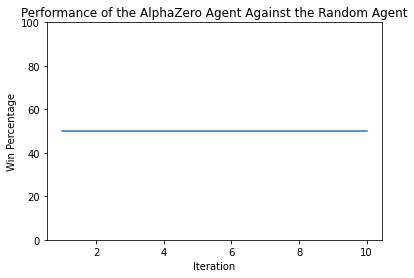

In [37]:
fig, ax = plt.subplots(1)

checkpoints = range(1, 11)
win_percentages = [win_percentage] * 10
win_percentages = [x * 100 for x in win_percentages]

plt.plot(checkpoints, win_percentages)

plt.xlabel('Iteration')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)
plt.title('Performance of the AlphaZero Agent Against the Random Agent')
plt.show()